In [5]:
%matplotlib inline


import numpy as np
from matplotlib import pyplot as plt


### Experiment exp_05

##### LPN architecture

```
num_preds(word, 2).
num_preds(syll, 3).
num_preds(cons, 3).
num_preds(vow,  3).


pred(Category, Index, Pred) :-
        num_preds(Category, N), 
        between(1, N, Index),
        format(atom(Pred), "A(~w, ~w)", [Category, Index]).

pred(Category, Pred) :- pred(Category, _, Pred).

consonant(C) :-
        consonants(Cs),
        member(C, Cs).

vowel(V) :-
        vowels(Vs),
        member(V, Vs).

from_cat(cons, X) :-
        consonant(X).
from_cat(vow, X) :-
        vowel(X).

lexeme(X) :-
        from_cat(cons, X)
        ;
        from_cat(vow, X).

:- begin(genlog).

hear(X-Y) ---> 'A(word, 1)'(X-Y|[]-[]).

macro(
      ('?A'(Xi-Yf|Z) ---> '?B'(Xi-Yi | Z), '?C'(Yi-Yf | Z))
     :-
     (pred(word, '?A'),
      pred(syll, '?B'),
      pred(word, '?C')
      )
     ).

macro(
      ('?A'(Xi-Yf|Z) ---> '?B'(Xi-Yi | Z), '?C'(Yi-Yf | Xi-Yi))
     :-
     (pred(word, '?A'),
      pred(syll, '?B'),
      pred(word, '?C')
      )
     ).


macro(
      ('?A'([A, B, C|X]-X|Z) ---> '?B'([A, B, C| X]-X | Z))
     :-
     (pred(word, '?A'),
      pred(syll, '?B'))
     ).

macro(
      ('?A'(X-X|Z))
     :-
     (pred(word, '?A'))
     ).


macro(
      ('?A'([A, B, C|R] - R | Z1-Z2) --->
       '?B'(A|Z1-Z2),
       '?C'(B|[A|Z1]-Z2),
       '?D'(C|[B, A | Z1]-Z2))
     :-
     (pred(syll, '?A'),
      pred(cons, '?B'),
      pred(vow,  '?C'),
      pred(cons, '?D'))
      ).

macro(
      ('?A'(X | Y-R) @ [Y \= R, Y = [A|Z]] --->
       '?B'(X | Z-R)
      )
     :-
     (member(Cat, [cons, vow]),
      pred(Cat, '?A'),
      pred(Cat, '?B'),
      lexeme(A)
     )
     ).

macro(
      ('?A'(A | Y - R) @ [Y \= R, Y = [B|Z]] --->
       '?B'(A | Z - R)
      )
     :-
     (member(Cat, [cons, vow]),
      pred(Cat, '?A'),
      pred(Cat, '?B'),
      from_cat(Cat, A),
      lexeme(B)
     )
     ).


macro(
      ('?A'(X | R-R))
     :-
     (member(Cat, [cons, vow]),
      pred(Cat, '?A'),
      from_cat(Cat, X)
     )
     ).
:- end(genlog).
```                            
                           
        
        
    
##### Experiment parameters

* evidence: power law distribution 1/N^(3/4)
* beam_width: 10
* time limit: 10 seconds
* max_iter: 2000
* started: 2:20 pm 7/1
* run on ec2 swarm (job id: x2AlTMupHdAyAuxP)
* two parallel runs (different random seeds)
    * subjob id: HXMO0cvBeFv0pxd
    * subjob id: lIhkOhqzpm3ebjOu

#### Analysis of one of the runs of exp_05:  every 100 iterations

* job id: HXMO0cvBeFv0pxd
* data generated by running:

```
parallel --joblog /tmp/ovbem_log ./number_loglike.pl out_gl_{}_seq_1_99.json ../../data/HXMO0cvBeFv0vpxd/ovbem_gl_{}.gl `seq 1 99` ::: $(seq -f "%04.0f" 1 100 2000)
```
https://github.com/edechter/GenLog/blob/f625f40616f6d9443fbf76836999218350b8de87/experiments/scripts/learn_number_morph/number_loglike.pl
* run time of each job was approximate 585s

##### Further analysis: running loglikelihood for runs 1 thrugh 200 every 10 iterations

* @ 1:40pm 7/3/2015
* ```parallel --joblog /tmp/exp_05_analysis_0002.log ./number_loglike.pl out_gl_{}_seq_1_99.json ../../data/HXMO0cvBeFv0vpxd/ovbem_gl_{}.gl `seq 1 99` ::: $(seq -f "%04.0f" 1 10 200) &``` 

In [ ]:
import glob
import json
import re

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)  


1  11  21  31  41  51  61  71  81  91  101  111  121  131  141  151  161  171  181  191  201  301  401  501  601  701  801  901  1000  1001  1101  1201  1301  1401  1501  1601  1701  1801  1901  2000 


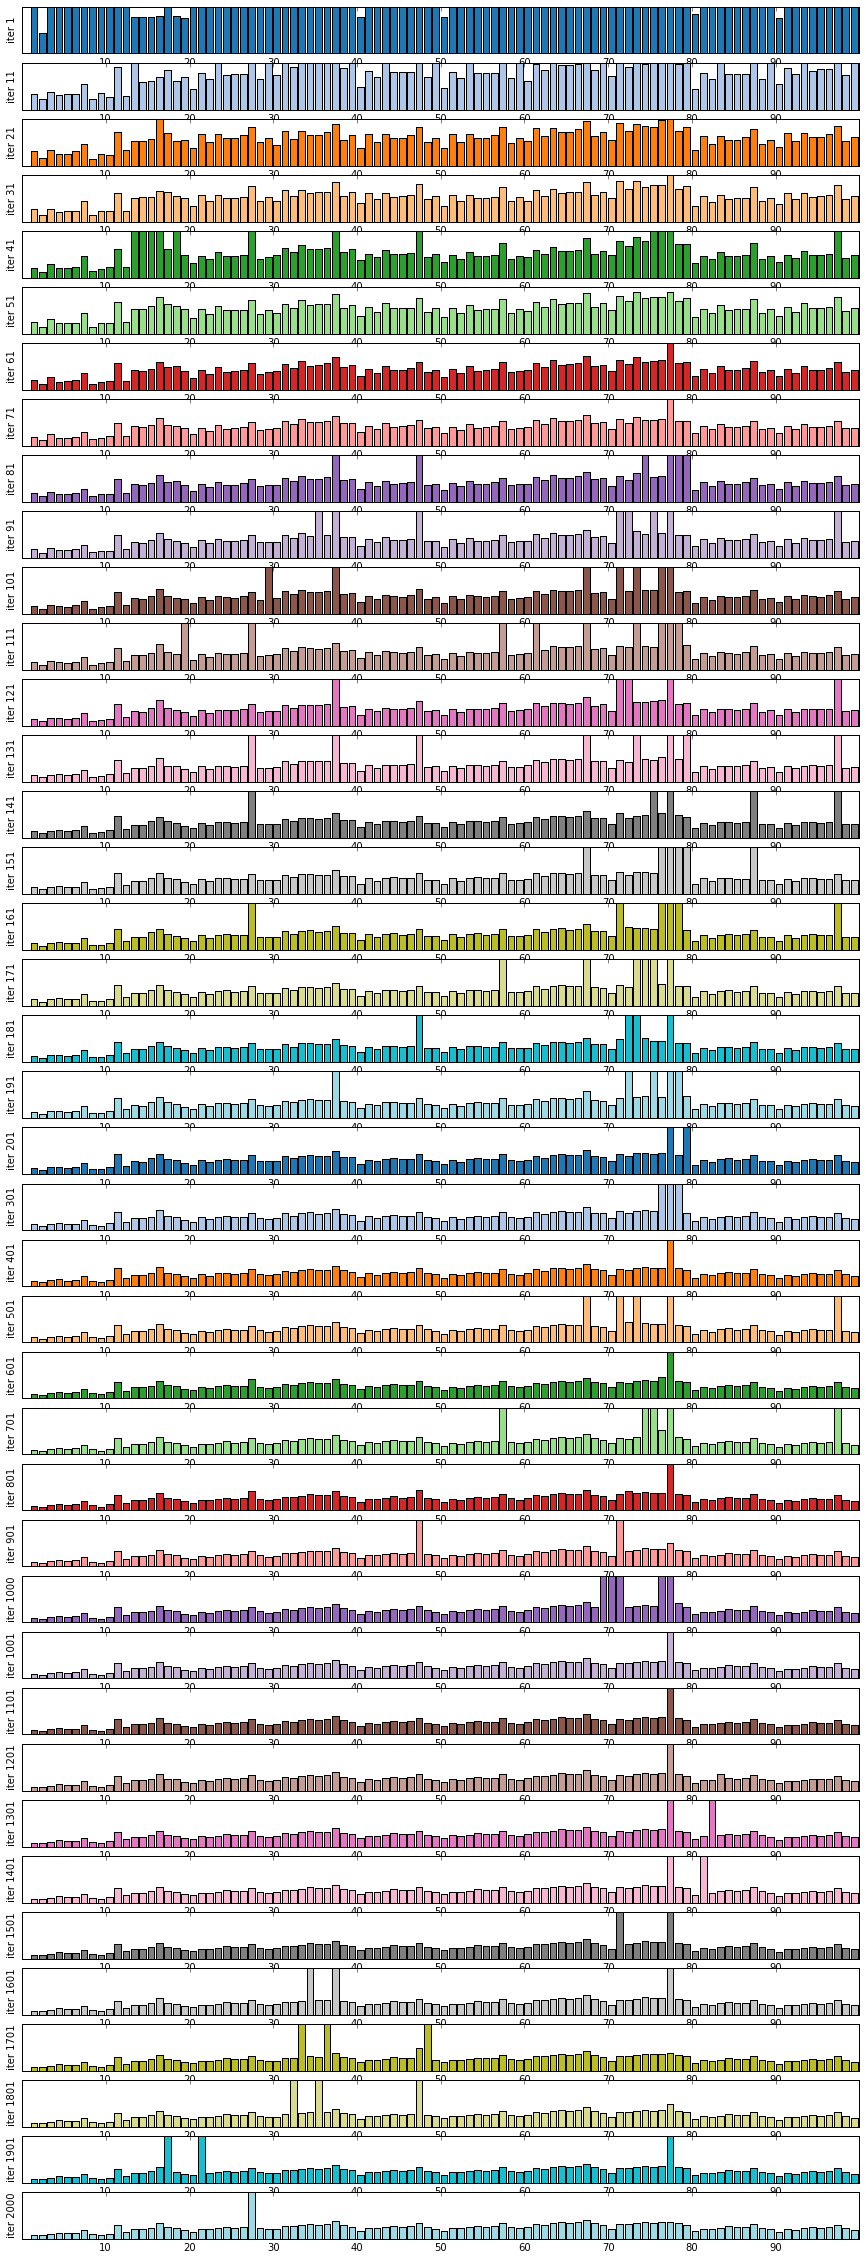

In [7]:

files = glob.glob('../../../../data/exp_05_analysis/HXMO0cvBeFv0pxd/out_gl*json')

min_val = -70

fig = plt.figure(figsize=(15, 40))

num_files = len(files)
for i, file in enumerate(files):
    gl_iter = int(re.match(r'.*(\d\d\d\d).*', file).groups()[0])
    print "%s "%gl_iter, 
    ax = fig.add_subplot(num_files, 1, i+1)

    obj = json.load(open(file, 'r'))
    xs = np.array([[x['number'], x['loglikelihood']] for x in obj])
    xs[xs < min_val]=min_val
    ax.bar(xs[:,0], -xs[:,1], color=tableau20[np.mod(i, 20)])
    ax.set_yticks([])    
    ax.set_xticks(range(10, 100, 10))
    ax.set_xticklabels(range(10, 100, 10))
    ax.set_ylabel('iter %i'%gl_iter)




**Figure:** Negative log likelihood of number words as a function of the number of words seen so far. If no parse of the number was found, then the negative log likelihood is set to a maximum value (e.g. number 1 iteration 1). 

#### Same analysis for second  run of exp_05

* job id: lIhkOhqzpm3ebjOu
* started at 4:05pm 7/3/2015
```
parallel --results /tmp/ovbem_analysis \
    --joblog=/tmp/ovbem_log_0002 \
    ./number_loglike.pl ../../data/exp_05_analysis/lIhkOhqzpm3ebjOu/out_gl_{}_seq_1_99.json ../../data/lIhkOhqzpm3ebjOu/ovbem_gl_{}.gl `seq 1 99` ::: $(seq -f "%04.0f" 1 10 200)
```

1  11  21  31  41  51  61  71  81  91  101  111  121  131  141  151  161  171  181  191 


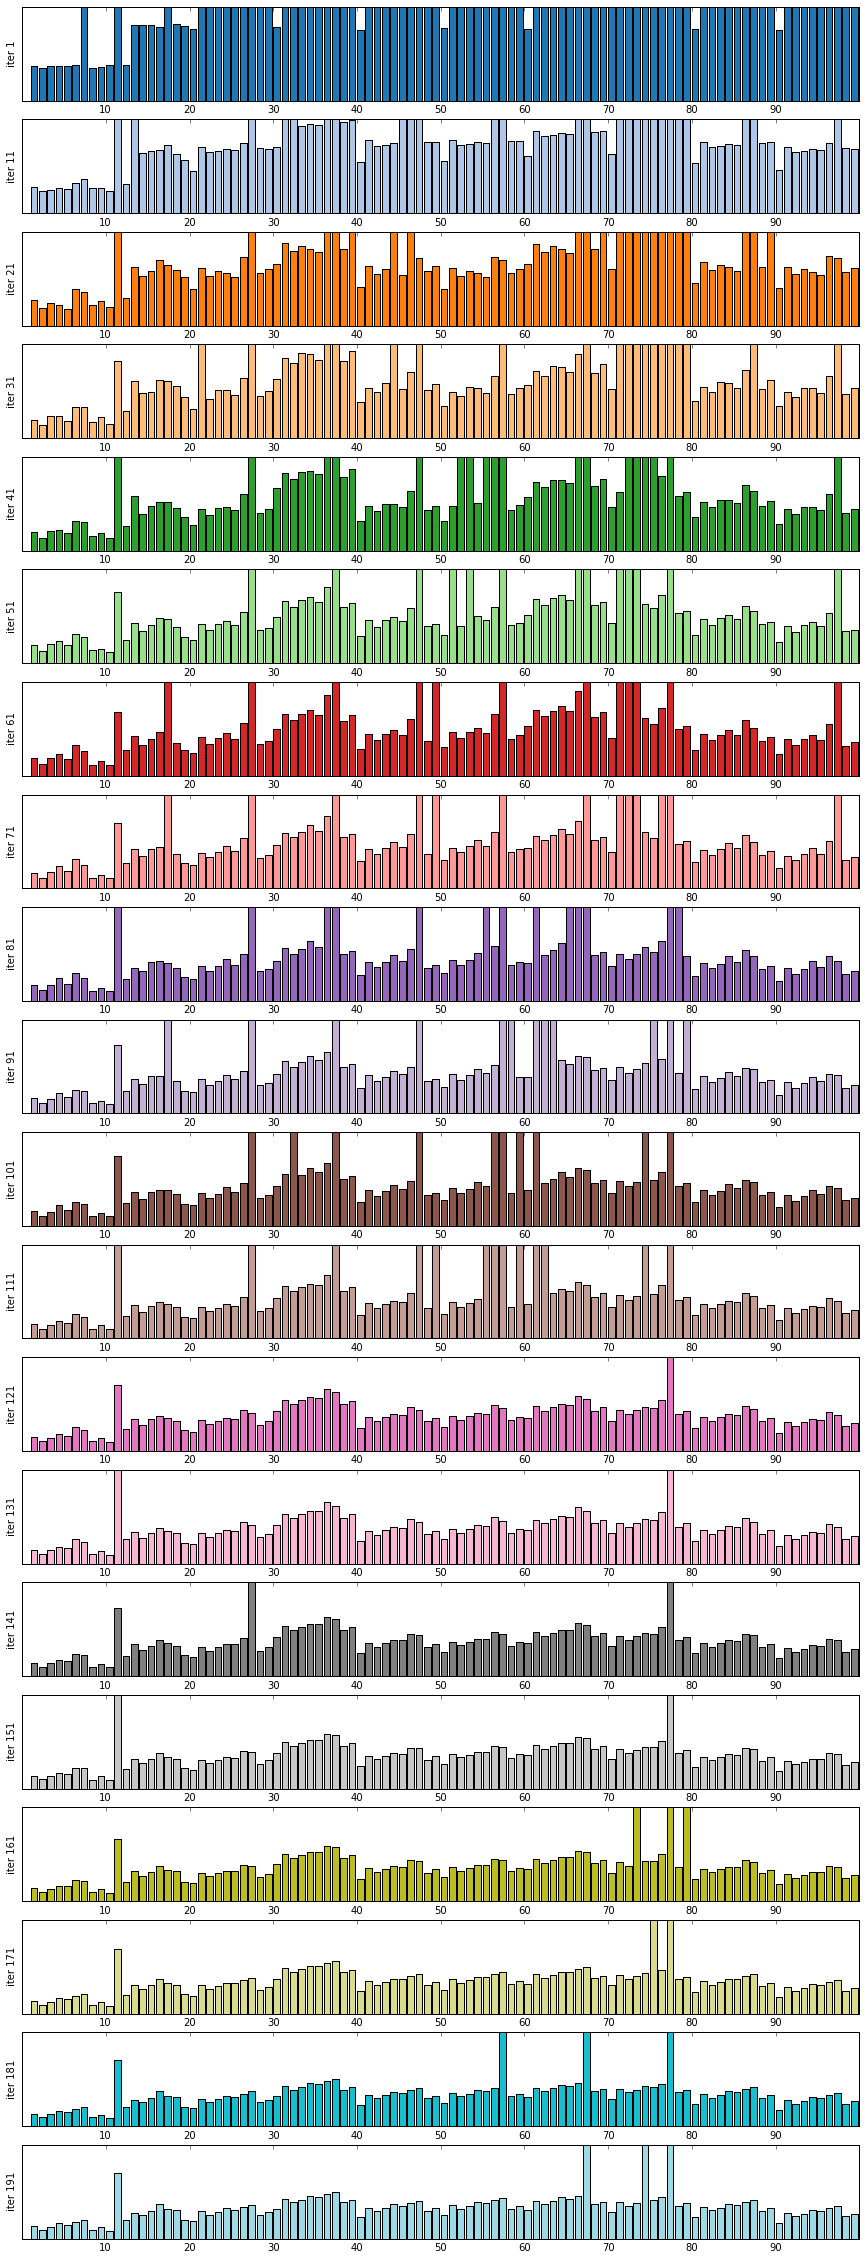

In [8]:

files = glob.glob('../../../../data/exp_05_analysis/lIhkOhqzpm3ebjOu/out_gl*json')

min_val = -70

fig = plt.figure(figsize=(15, 40))

num_files = len(files)
for i, file in enumerate(files):
    gl_iter = int(re.match(r'.*(\d\d\d\d).*', file).groups()[0])
    print "%s "%gl_iter, 
    ax = fig.add_subplot(num_files, 1, i+1)

    obj = json.load(open(file, 'r'))
    xs = np.array([[x['number'], x['loglikelihood']] for x in obj])
    xs[xs < min_val]=min_val
    ax.bar(xs[:,0], -xs[:,1], color=tableau20[np.mod(i, 20)])
    ax.set_yticks([])    
    ax.set_xticks(range(10, 100, 10))
    ax.set_xticklabels(range(10, 100, 10))
    ax.set_ylabel('iter %i'%gl_iter)


